# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**COMPLETA EN ESTA CELDA TU RESPUESTA**

---
Los datos que considero que puede ser útiles a la hora de trabajar en el problema son:

* Ubicación del inmueble - el barrio/zona donde se encuentre en determinada ciudad incide en el precio del mismo
* Cantidad de habitaciones y baños - el número de habitaciones y baños implica una mayor o menor comodidad por lo que el precio variará
* Superficie total y superficie cubierta - el tamaño del inmueble es un factor importante a la hora de elegir su precio
* Tipo de propiedad - el valor de una casa con respecto a un departamento con identicas características puede variar


---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [311]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
import random
from sklearn.metrics import mean_squared_error
from math import sqrt

In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [313]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
data = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv",sep=",",decimal=",")
print(type(data))
print("\nEl dataset tiene {} filas y {} columnas\n".format(data.shape[0],data.shape[1]))
data.head(5)

<class 'pandas.core.frame.DataFrame'>

El dataset tiene 146660 filas y 19 columnas



,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.6058798,-58.38494910000001,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624055600000005,-58.41211020000001,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.5812941,-58.436754099999995,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.9141937305,-57.938219141000005,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [314]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
data.count()

start_date         146660
end_date           146660
created_on         146660
lat                136735
lon                136701
l1                 146660
l2                 146660
l3                 146660
rooms              146660
bedrooms           146660
bathrooms          140703
surface_total      126133
surface_covered    125046
price              146660
currency           146660
title              146660
description        146660
property_type      146660
operation_type     146660
dtype: int64

Usando la funcion ***count*** notamos que en el campo count no todos los datos tienen el mismo valor, por lo que podemos afirmar que hay datos nulos en la las columnas lat, lon, bathrooms, surface_total y surface_covered.

Realizamos la suma de los valores nulos de cada campo

In [315]:
data.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [316]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
data.groupby('property_type').agg({'property_type': 'count'})

,property_type
property_type,
Casa,21521
Casa de campo,322
Cochera,259
Departamento,107326
Depósito,265
Local comercial,325
Lote,1312
Oficina,658
Otro,374


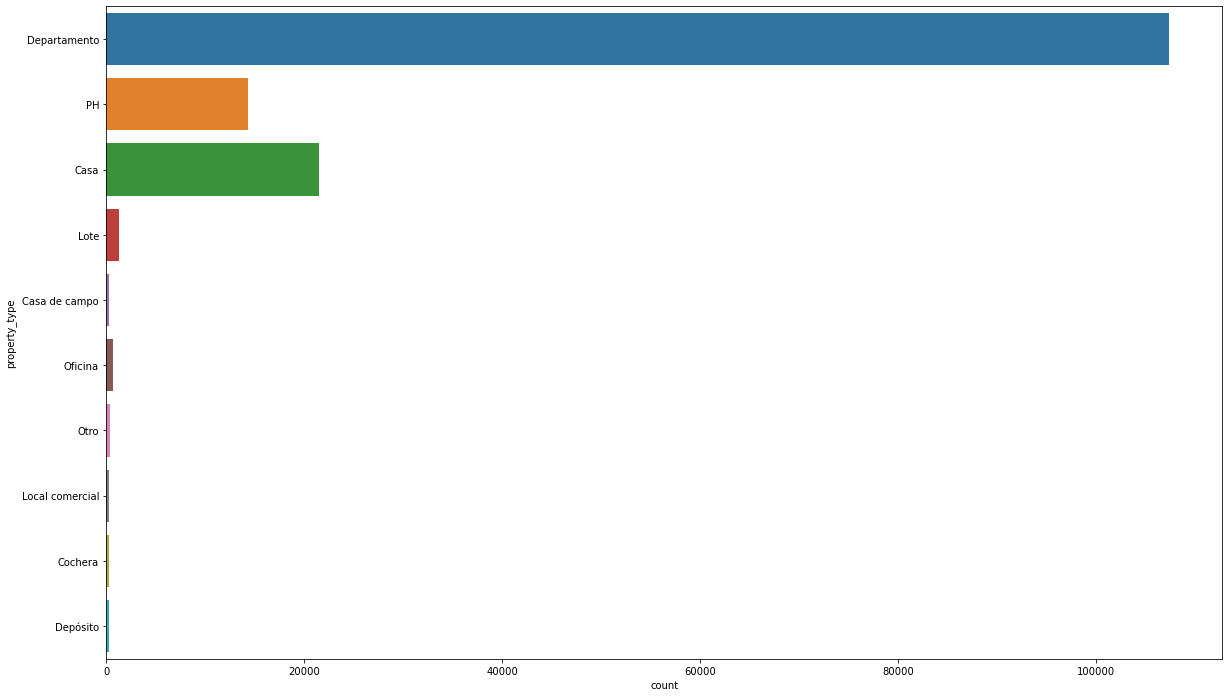

In [317]:
fig, axs = plt.subplots(figsize=(20,12))
sns.countplot(data = data, y = "property_type")

Por lo tanto se puede observar que aunque haya 10 tipos de propiedades, las instancias se encuentran distribuidas por amplia mayoria entre Casa, PH y Departamento.

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [318]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
data.groupby(['l1','l2','l3']).agg({'l3': 'count'})

l3
l1        l2                       l3                       
Argentina Bs.As. G.B.A. Zona Norte Escobar              1419
                                   General San Martín   1796
                                   José C Paz            287
                                   Malvinas Argentinas   382
                                   Pilar                3709
...                                                      ...
          Capital Federal          Villa Riachuelo        42
                                   Villa Santa Rita      354
                                   Villa Soldati          69
                                   Villa Urquiza        3339
                                   Villa del Parque     1361

[89 rows x 1 columns]

In [319]:
data.groupby(['l1','l2']).agg({'l3': 'count'})

l3
l1        l2                             
Argentina Bs.As. G.B.A. Zona Norte  24282
          Bs.As. G.B.A. Zona Oeste  12666
          Bs.As. G.B.A. Zona Sur    17173
          Capital Federal           92539

Text(0.5, 1.0, 'Bs.As. G.B.A. Zona Oeste')

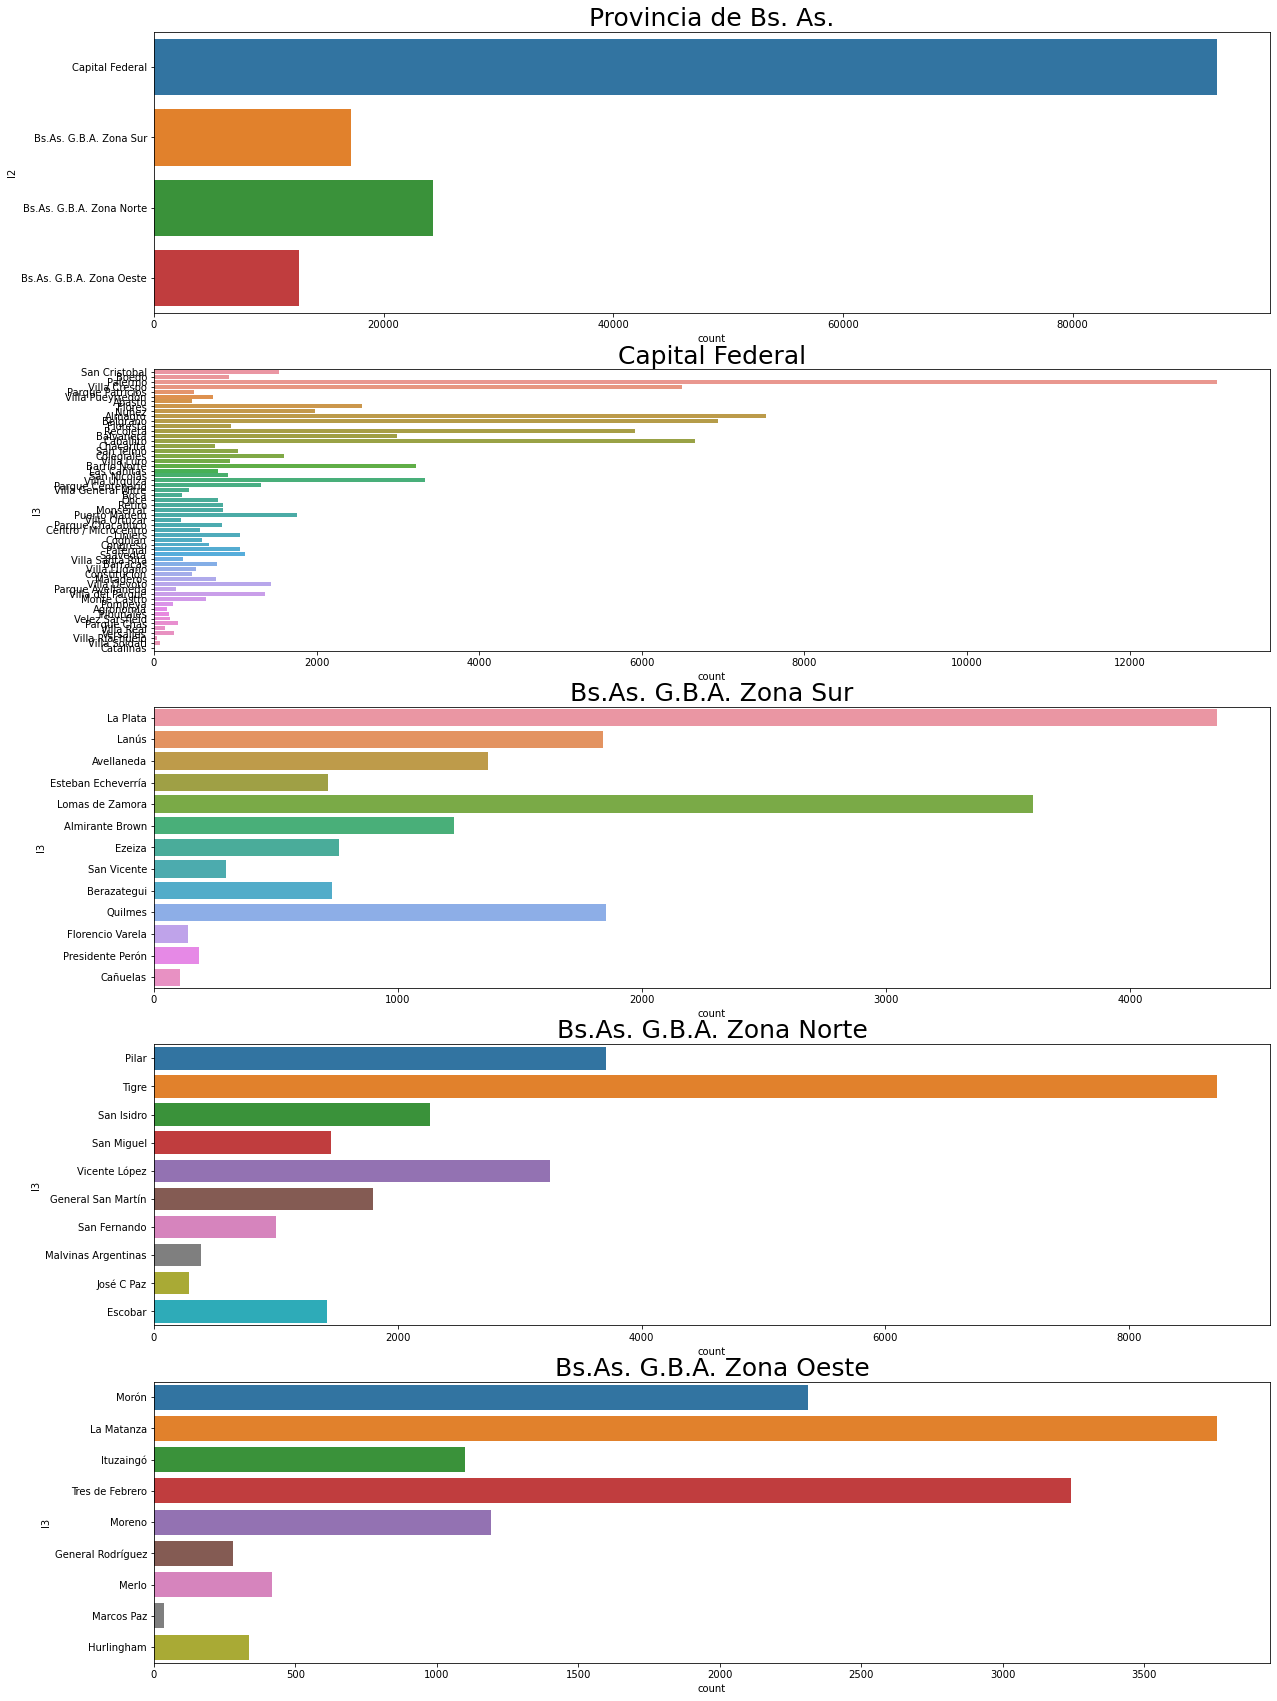

In [320]:
plt.figure(figsize = (20,30))
plt.subplot(5,1,1)
sns.countplot(data=data, y='l2') 
plt.gca().set_title('Provincia de Bs. As.', fontsize=25)
plt.subplot(5,1,2)
sns.countplot(data=data[(data.l2=='Capital Federal')], y='l3')
plt.gca().set_title('Capital Federal', fontsize=25)
plt.subplot(5,1,3)
sns.countplot(data=data[(data.l2=='Bs.As. G.B.A. Zona Sur')], y='l3')
plt.gca().set_title('Bs.As. G.B.A. Zona Sur', fontsize=25)
plt.subplot(5,1,4)
sns.countplot(data=data[(data.l2=='Bs.As. G.B.A. Zona Norte')], y='l3')
plt.gca().set_title('Bs.As. G.B.A. Zona Norte', fontsize=25)
plt.subplot(5,1,5)
sns.countplot(data=data[(data.l2=='Bs.As. G.B.A. Zona Oeste')], y='l3')
plt.gca().set_title('Bs.As. G.B.A. Zona Oeste', fontsize=25)

Se puede observar que en Capital Federal se acumulan la mayoria de las instancias, por lo que podemos ir reduciendo nuestro foco de observacion a los tipos de propiedades Casa, Departamento y PH que se encuentran ubicados en Capital Federal, puesto que estos representan la mayoria de los datos.

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

Las clases con mas propiedades publicadas son:
* Tipo de propiedad: Casa, Departamento y PH
* Region: Capital Federal

In [321]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
data_CF = data[(data.l2=='Capital Federal')]
data_CF.groupby('property_type').agg({'property_type': 'count'})

,property_type
property_type,
Casa,2692
Casa de campo,1
Cochera,106
Departamento,79029
Depósito,30
Local comercial,102
Lote,243
Oficina,458
Otro,114


In [322]:
data_CFD = data_CF[(data.property_type=='Departamento')]
data_CFC = data_CF[(data.property_type=='Casa')]
data_CFPH = data_CF[(data.property_type=='PH')]

data_CFT = data_CFC
data_CFT = data_CFT.append(data_CFD)
data_CFT = data_CFT.append(data_CFPH)
data_CFT.groupby('property_type').agg({'property_type': 'count'})

<ipython-input-322-d96636305e10>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_CFD = data_CF[(data.property_type=='Departamento')]
<ipython-input-322-d96636305e10>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_CFC = data_CF[(data.property_type=='Casa')]
<ipython-input-322-d96636305e10>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_CFPH = data_CF[(data.property_type=='PH')]


,property_type
property_type,
Casa,2692
Departamento,79029
PH,9764


In [323]:
data_CFT.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
336,2019-03-04,2019-06-09,2019-03-04,-34.620739,-58.394436999999996,Argentina,Capital Federal,San Cristobal,3.0,1.0,2.0,116.0,116.0,290000.0,USD,Venta casa esquina Carlos Calvo y Sarandí,Corredor Responsable: Cristian Arnal Ponti - C...,Casa,Venta
384,2019-03-04,2019-08-17,2019-03-04,-34.650923,-58.489653000000004,Argentina,Capital Federal,Mataderos,3.0,2.0,1.0,171.0,120.0,179900.0,USD,CASA EN VENTA MATADERO COCHERA Y TERRAZA,Corredor Responsable: Martin Macagno - CUCICBA...,Casa,Venta
385,2019-03-04,2019-06-17,2019-03-04,-34.587854,-58.497227,Argentina,Capital Federal,Villa Pueyrredón,3.0,2.0,1.0,71.0,68.0,174000.0,USD,Casa tipo Duplex 2 plantas excelente esquina.,Corredor Responsable: Ariel Champanier - C.U.C...,Casa,Venta
446,2019-03-04,2019-08-17,2019-03-04,-34.613369,-58.488637,Argentina,Capital Federal,Villa Santa Rita,5.0,4.0,3.0,230.0,244.0,490000.0,USD,VENTA CASA 5 AMBIENTES,Corredor Responsable: Mónica Silvia Martinuzzi...,Casa,Venta
454,2019-03-04,2019-03-13,2019-03-04,-34.653948,-58.47288399999999,Argentina,Capital Federal,Parque Avellaneda,6.0,5.0,1.0,210.0,189.0,225000.0,USD,"Venta Casa, PARQUE AVELLANEDA 6 amb y cochera",Corredor Responsable: Martin Macagno - CUCICBA...,Casa,Venta


In [324]:
data_CFT.shape

(91485, 19)

Luego de aplicar el filtrado en tipo de propiedad y region, el resultado es un dataframe con 91485 instancias y 19 columnas.

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [325]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
properati = data_CFT
print(properati.dtypes)
properati.describe()

start_date         object
end_date           object
created_on         object
lat                object
lon                object
l1                 object
l2                 object
l3                 object
rooms              object
bedrooms           object
bathrooms          object
surface_total      object
surface_covered    object
price              object
currency           object
title              object
description        object
property_type      object
operation_type     object
dtype: object


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
count,91485,91485,91485,86951,86937,91485,91485,91485,91485,91485,89314,82568,82250,91485,91485,91485,91485,91485,91485
unique,362,408,362,31502,31785,1,1,57,20,16,13,719,611,5200,1,43106,58676,3,1
top,2019-07-31,9999-12-31,2019-07-31,-34.597255600000004,-58.44549839999999,Argentina,Capital Federal,Palermo,3.0,1.0,1.0,50.0,40.0,125000.0,USD,DEPARTAMENTO EN VENTA,EDIFICIO DE CATEGORIA CON MATERIALES Y ACCESOR...,Departamento,Venta
freq,6951,10986,6951,254,254,91485,91485,13007,28327,34092,54801,1843,2409,1270,91485,3377,235,79029,91485


Al usar el metodo 'describe()' puedo notar que las variables no estan en formato numerico, entonces decido transformarlas.

In [326]:
properati['start_date'] = pd.to_datetime(properati['start_date'], format='%Y-%m-%d')
#properati['end_date'] = pd.to_datetime(properati['end_date'], format='%Y-%m-%d')
properati['created_on'] = pd.to_datetime(properati['created_on'], format='%Y-%m-%d')

Transformo a variables numericas por que estan todos los datos en format

In [327]:
properati['lat']=properati['lat'].apply(pd.to_numeric)
properati['lon']=properati['lon'].apply(pd.to_numeric)
properati['rooms']=properati['rooms'].apply(pd.to_numeric)
properati['bedrooms']=properati['bedrooms'].apply(pd.to_numeric)
properati['bathrooms']=properati['bathrooms'].apply(pd.to_numeric)
properati['surface_total']=properati['surface_total'].apply(pd.to_numeric)
properati['surface_covered']=properati['surface_covered'].apply(pd.to_numeric)
properati['price']=properati['price'].apply(pd.to_numeric)

In [328]:
properati.dtypes

start_date         datetime64[ns]
end_date                   object
created_on         datetime64[ns]
lat                       float64
lon                       float64
l1                         object
l2                         object
l3                         object
rooms                     float64
bedrooms                  float64
bathrooms                 float64
surface_total             float64
surface_covered           float64
price                     float64
currency                   object
title                      object
description                object
property_type              object
operation_type             object
dtype: object

In [329]:
properati.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,86951.000000,86937.000000,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,-34.599081,-58.436002,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,0.023957,0.036297,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.613757,-58.459605,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,-34.599446,-58.433789,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,-34.584148,-58.410143,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,-34.535818,-58.353930,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


Text(0.5, 1.0, 'surface_covered antes de limpiar los outliers')

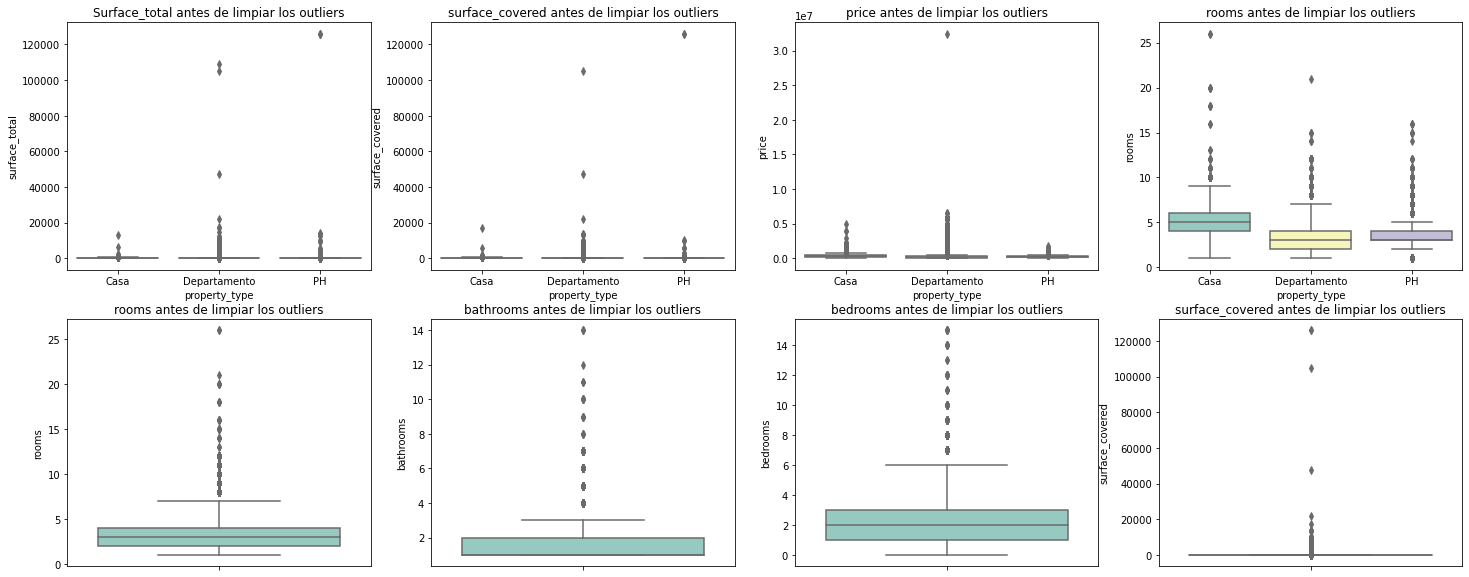

In [330]:
fig, axs = plt.subplots(nrows=2,ncols=4,figsize=(25,10))

#Boxplots relacionados con el tipo de propiedad
sns.boxplot(x="property_type", y="surface_total",data=properati, palette="Set3", ax=axs[0][0]).set_title('Surface_total antes de limpiar los outliers')
sns.boxplot(x="property_type", y="surface_covered",data=properati, palette="Set3", ax=axs[0][1]).set_title('surface_covered antes de limpiar los outliers')
sns.boxplot(x="property_type", y="price",data=properati, palette="Set3", ax=axs[0][2]).set_title('price antes de limpiar los outliers')
sns.boxplot(x="property_type", y="rooms",data=properati, palette="Set3", ax=axs[0][3]).set_title('rooms antes de limpiar los outliers')

#Boxplots individuales
sns.boxplot(y="rooms",data=properati, palette="Set3", ax=axs[1][0]).set_title('rooms antes de limpiar los outliers')
sns.boxplot(y="bathrooms",data=properati, palette="Set3", ax=axs[1][1]).set_title('bathrooms antes de limpiar los outliers')
sns.boxplot(y="bedrooms",data=properati, palette="Set3", ax=axs[1][2]).set_title('bedrooms antes de limpiar los outliers')
sns.boxplot(y="surface_covered",data=properati, palette="Set3", ax=axs[1][3]).set_title('surface_covered antes de limpiar los outliers')

Hay valores incongruentes en los boxplots analizados. Por ejemplo, surface covered y surface total. Tambien se nota que la desviacion estandar en el describe realizado previamente es mucho mayor que la media en los casos de surface total y surface covered. Por lo tanto, procederemos a eliminar estos datos.

Decidimos no contar con los valores de surface_covered y surface_total mayores a 1000 pues consideramos que no son dimensiones reales al igual que las de dimesiones menor a 15 o las que tengasn surfaced_covered mayores a surface_total.

Tambien tenemos 1 valor atipico muy lejano al resto al analizar los valores de precio, por lo que tampoco lo tendremos en cuenta para futuros analisis.

Procederemos tambien a eliminar los outliers en rooms, bathrooms y bedrooms para poder analizar de una manera mas clara estos boxplots.

In [331]:
#Antes de realizar el filtrado, primero copio el dataframe

properati_copy = properati.copy()

#Aplicado de filtrado
properati=properati[(properati.surface_total <200)]
properati=properati[(properati.surface_total >15)]
properati=properati[(properati.surface_covered <= properati.surface_total)]
properati=properati[(properati.price <400000)]
properati=properati[(properati.rooms <6)]
properati=properati[(properati.bathrooms <4)]
properati=properati[(properati.bedrooms <7)]
properati=properati[(properati.surface_covered <130)]


In [332]:
properati.shape

(64853, 19)

Text(0.5, 1.0, 'surface_covered despues de limpiar los outliers')

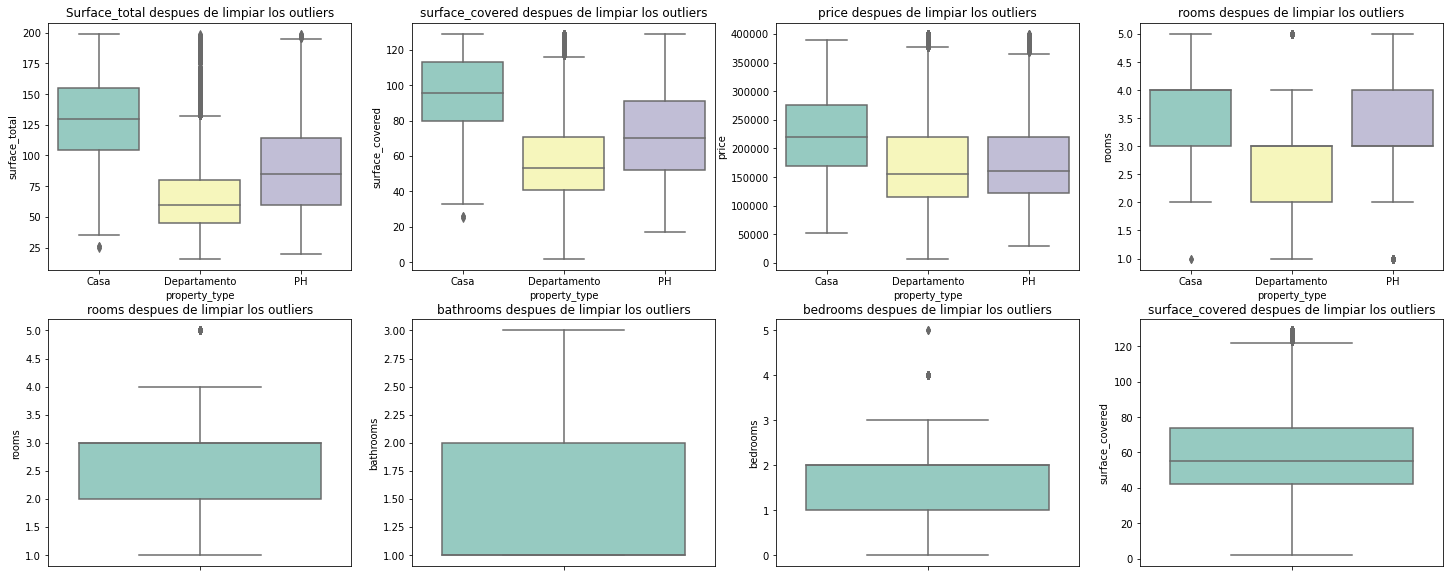

In [333]:
fig, axs = plt.subplots(nrows=2,ncols=4,figsize=(25,10))

#Boxplots relacionados con el tipo de propiedad
sns.boxplot(x="property_type", y="surface_total",data=properati, palette="Set3", ax=axs[0][0]).set_title('Surface_total despues de limpiar los outliers')
sns.boxplot(x="property_type", y="surface_covered",data=properati, palette="Set3", ax=axs[0][1]).set_title('surface_covered despues de limpiar los outliers')
sns.boxplot(x="property_type", y="price",data=properati, palette="Set3", ax=axs[0][2]).set_title('price despues de limpiar los outliers')
sns.boxplot(x="property_type", y="rooms",data=properati, palette="Set3", ax=axs[0][3]).set_title('rooms despues de limpiar los outliers')

#Boxplots individuales
sns.boxplot(y="rooms",data=properati, palette="Set3", ax=axs[1][0]).set_title('rooms despues de limpiar los outliers')
sns.boxplot(y="bathrooms",data=properati, palette="Set3", ax=axs[1][1]).set_title('bathrooms despues de limpiar los outliers')
sns.boxplot(y="bedrooms",data=properati, palette="Set3", ax=axs[1][2]).set_title('bedrooms despues de limpiar los outliers')
sns.boxplot(y="surface_covered",data=properati, palette="Set3", ax=axs[1][3]).set_title('surface_covered despues de limpiar los outliers')

Los boxplots de ambas supericies vs el tipo de propiedad son muy similares. Siendo las superfices de las casas mayores en terminos generales a los departamentos y a los PH, lo mismo ocurre con la cantidad de habitaciones y el precio. Por lo que podemos suponer que a mayor superficie y cantidad de habitaciones, el precio aumenta. Por lo tanto podemos afirmar que las casas seran usualmente mas caras en ralacion a los departamentos y PH ya que comunmente tienen mayor superficie y cantidad de habitaciones.

De las variables de rooms, bathrooms y bedrooms podemos concluir que la mayoria de las propiedades cuenta con 2 o 3 habitaciones, con 1 o 2 baños (distribucion no uniforme) y 1 o 2 dormitorios. 

Tambien concluimos que las superficias cubiertas de dichos inmuebles varia en su mayoria entre 40 y 75 mts cuadrados  con cierta tendencia a los valores menores.

In [334]:
#Vuelvo a utilizar el dataframe sin el filtrado previo ya que consideramos mejor para futuros analisis no realizar un filtrado tan exhaustivo
properati=properati_copy
#Aplicado de filtrado
properati=properati[(properati.surface_total <1000)]
properati=properati[(properati.surface_total >15)]
properati=properati[(properati.surface_covered <= properati.surface_total)]
properati=properati[(properati.price <4000000)]
properati.shape

(81083, 19)

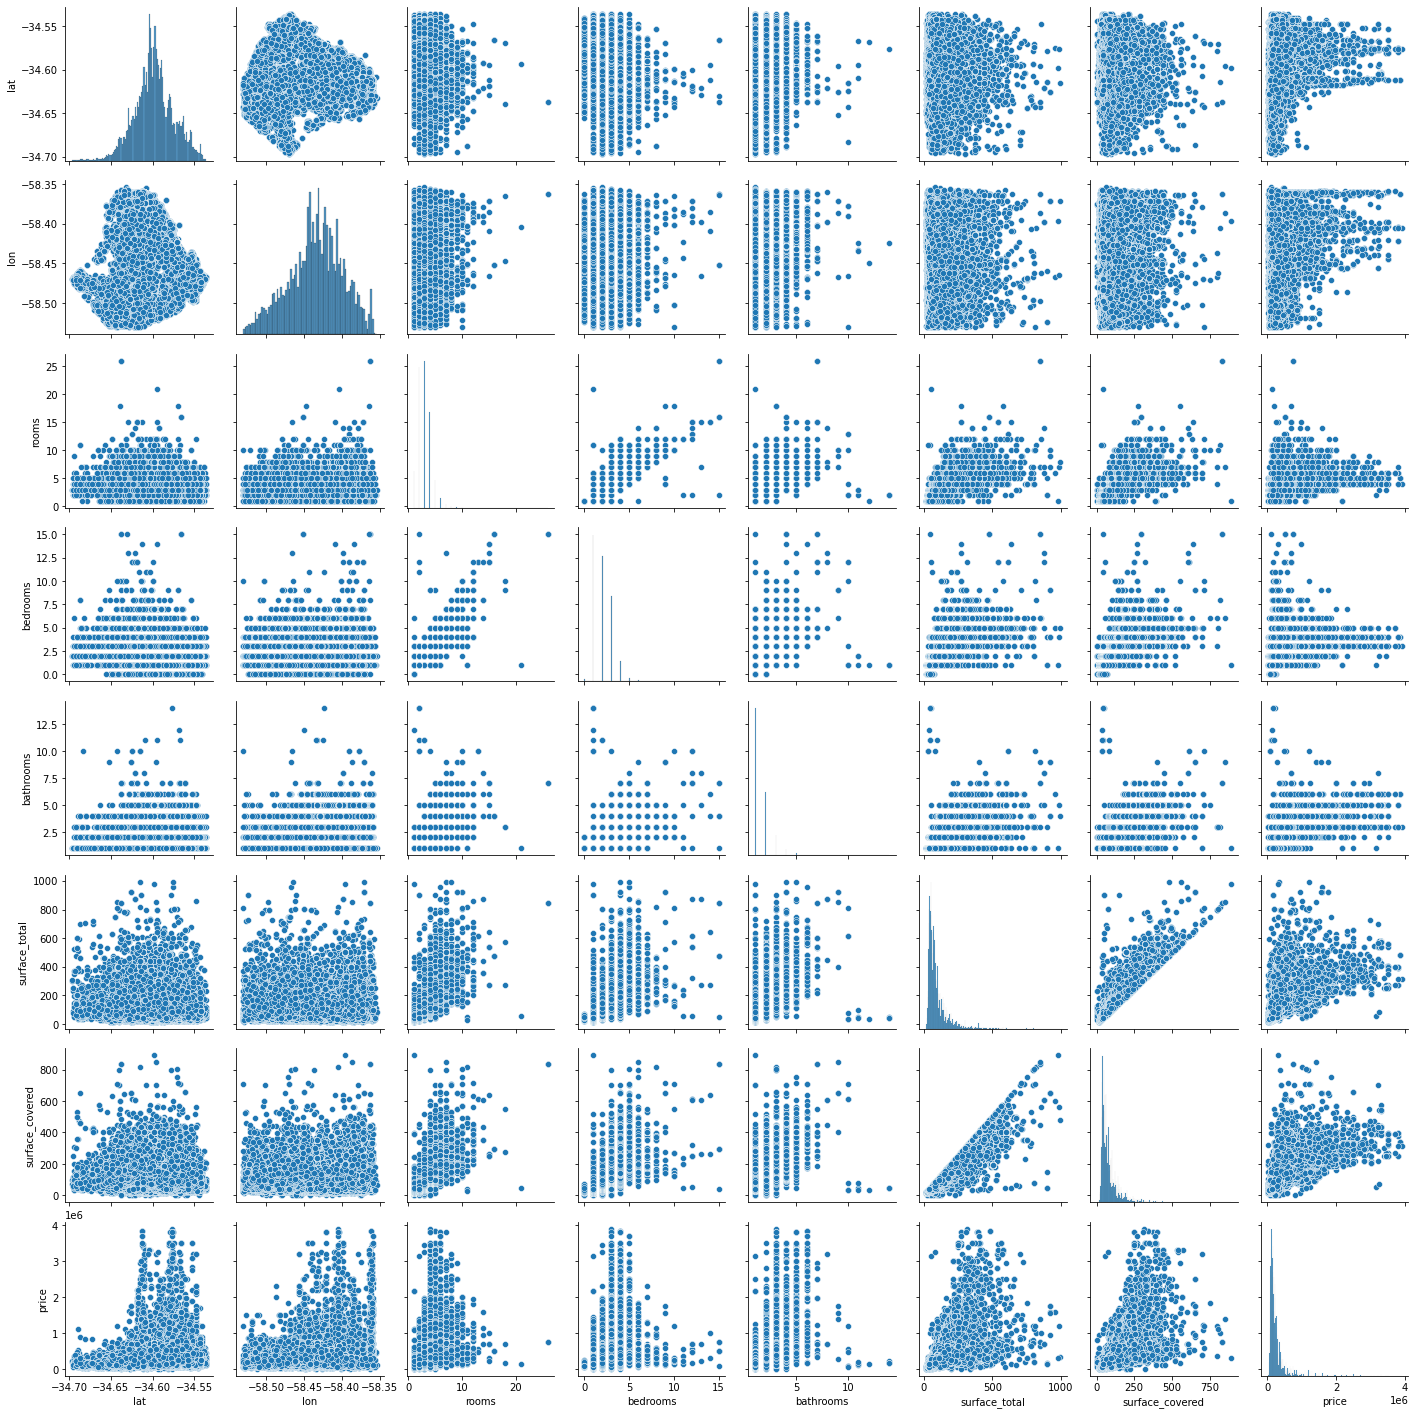

In [335]:
sns.pairplot(properati)

Del primer pariplot realizado no se obtuvieron relaciones observables por lo que se opto por aplicar un hue='price'

D:\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


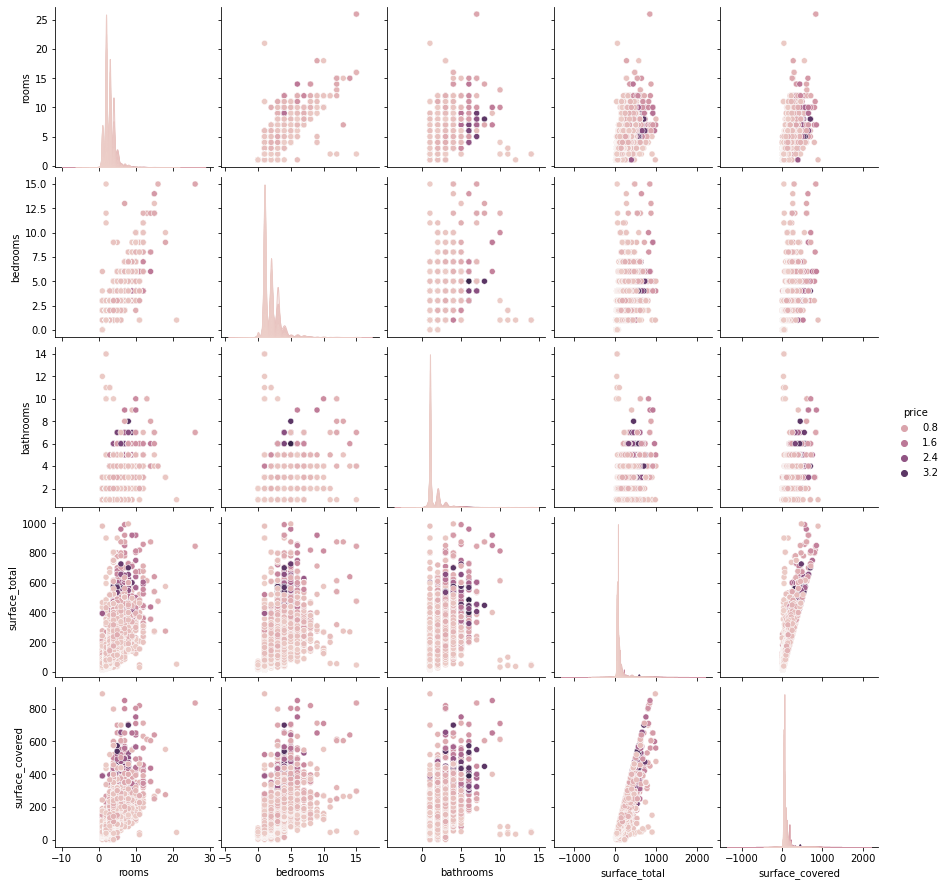

In [336]:
sns.pairplot(properati.iloc[:,[8,9,10,11,12,13]], hue="price")

Se puede observar que los menores precios se dan en menores superficies y habitaciones (asi como baños y dormitorios). Y al aumentar estos valores el precio no depende intrinsicamente de estos, pues varia su aumento. Por lo que suponemos que no depende unicamente de estas variables.

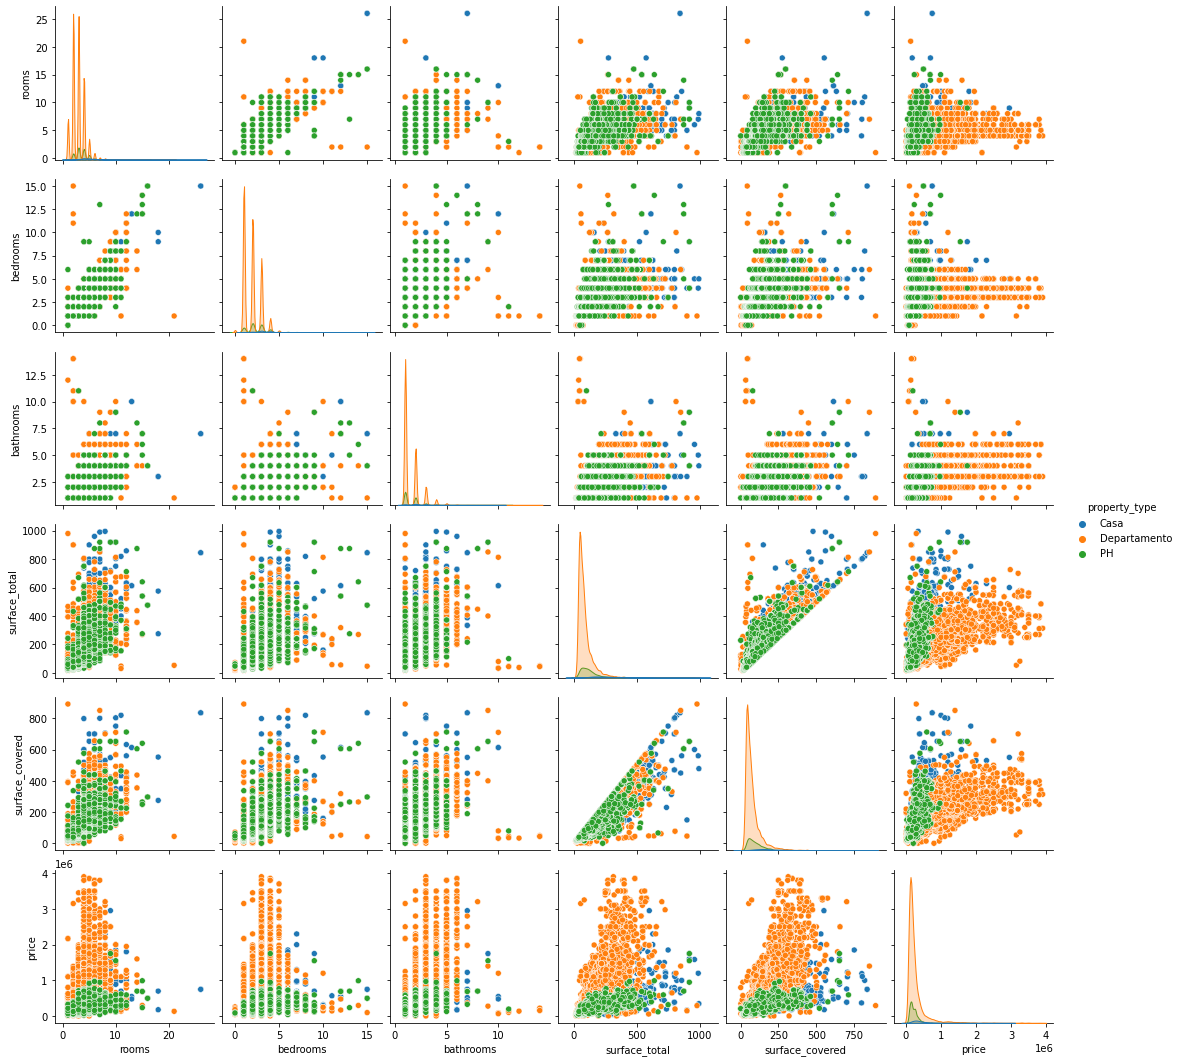

In [337]:
sns.pairplot(properati.iloc[:,[8,9,10,11,12,13,17]], hue="property_type")

En este pairplot nos enfocaremos de manera mas exhaustiva en el precio vs superficies y habitaciones con un foco en el tipo de propiedad. Notamos que las casas y los PH se comportan de manera mas congruente con la suposicion de que el precio aumenta en relacion a la cantidad de habitaciones y superficie. Los departamentos tienen a tener un comportamiento mas irregular. Se pueden observar departamentos con pocas habitaciones y de superficies pequeñas con precios muy elevados. Por lo que deducimos que los precios de los departementos pueden llegar a estar incorrectos o que dependen de otras variables que no estamos considerando.

D:\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


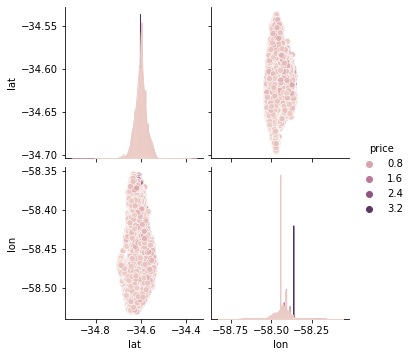

In [338]:
sns.pairplot(properati.iloc[:,[3,4,13]], hue="price")

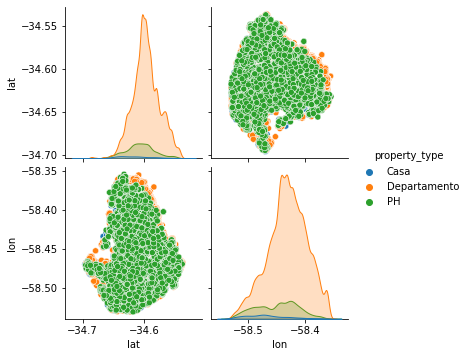

In [339]:
sns.pairplot(properati.iloc[:,[3,4,17]], hue="property_type")

En los 2 pairplots previos se quiso observar si habia algun tipo de relacion entre la ubicacion, el tipo de propiedad y el precio. No se obtuvieron conclusiones pero se volvera a evaluar esto mas adelante, obteniendo resultados mas concretos.

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

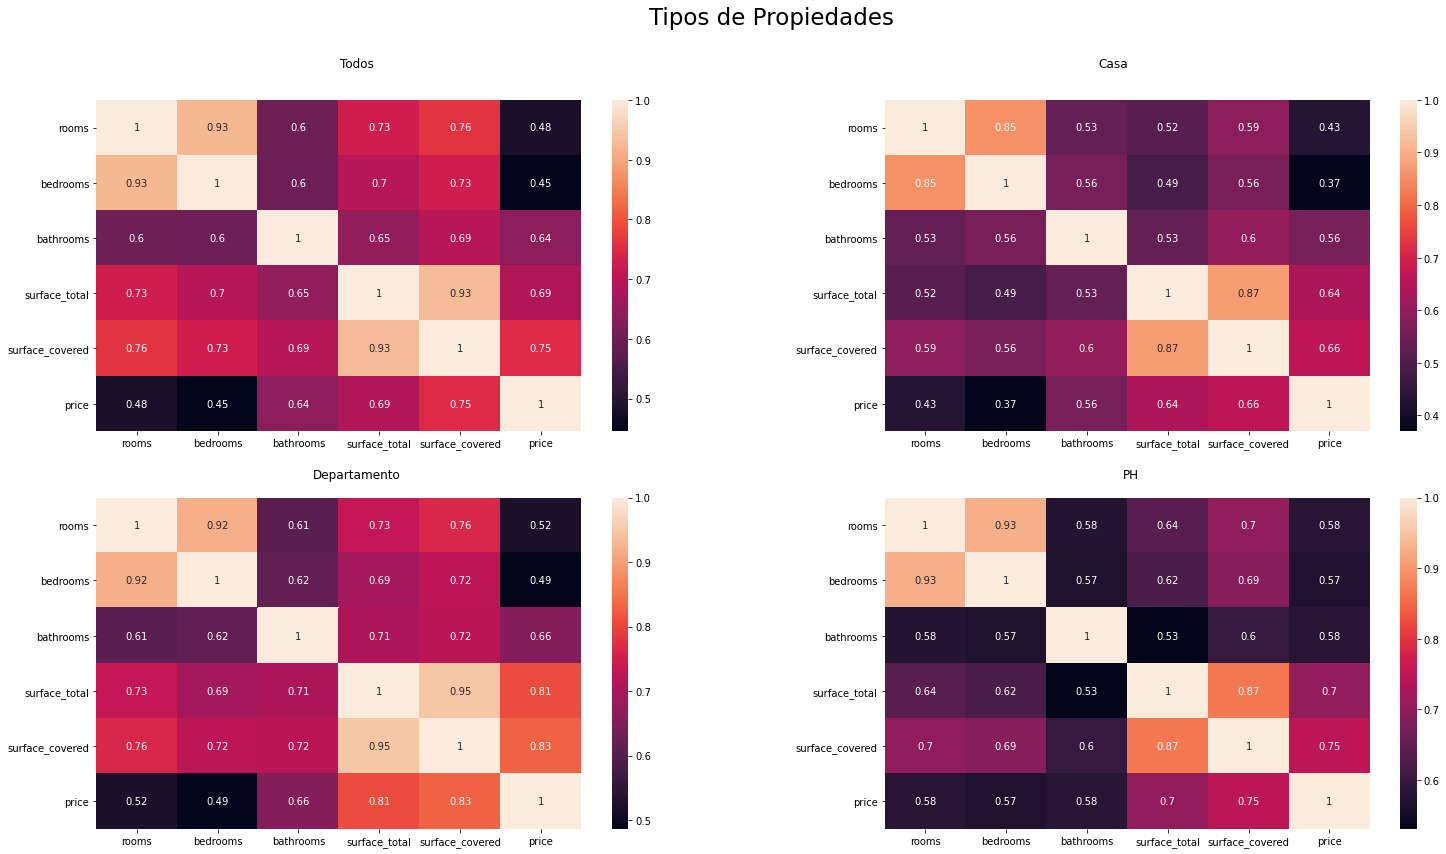

In [340]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(25,15))
plt.text(x=0.5, y=0.87, s="Tipos de Propiedades", fontsize=23, ha="center", transform=fig.transFigure)
plt.text(x=0.27, y=0.83, s= "Todos", fontsize=12, ha="center", transform=fig.transFigure)
plt.text(x=0.69, y=0.83, s= "Casa", fontsize=12, ha="center", transform=fig.transFigure)
plt.text(x=0.27, y=0.45, s= "Departamento", fontsize=12, ha="center", transform=fig.transFigure)
plt.text(x=0.70, y=0.45, s= "PH", fontsize=12, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)
sns.heatmap(properati.iloc[:,[8,9,10,11,12,13]].corr(), annot = True,  cbar_kws= {'orientation': 'vertical'}, ax=axs[0][0] )
sns.heatmap(properati[(properati.property_type=='Casa')].iloc[:,[8,9,10,11,12,13]].corr(), annot = True,  cbar_kws= {'orientation': 'vertical'}, ax=axs[0][1] )
sns.heatmap(properati[(properati.property_type=='Departamento')].iloc[:,[8,9,10,11,12,13]].corr(), annot = True,  cbar_kws= {'orientation': 'vertical'}, ax=axs[1][0] )
sns.heatmap(properati[(properati.property_type=='PH')].iloc[:,[8,9,10,11,12,13]].corr(), annot = True,  cbar_kws= {'orientation': 'vertical'}, ax=axs[1][1] )
plt.show()

El heatmap nos demuestra que en todos los tipos de propiedades el precio tiene una correlacion positiva mayor a 0.5 en relacion a las superficies (con un numero mayor cuando es superficie cubierta) y los baños. Lo que nos indica que la cantidad de baños influye de mayor manera en el precio en comparacion a la cantidad de habitaciones o dormitorios. Al mismo tiempo se puede notar que en cuanto a superficie cubierta, los baños son los que tienen la menor correlacion. Esto nos dice que el conjunto de ambas, gran superficie cubierta y gran cantidad de baños no estan tan correlacionados como se esperaria. Es por esto que podemos ir asumiendo que los mayores precios se daran cuando ambos se encuentren con una buena relacion supercie cubierta vs cantidad de baños.

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


Text(0.5, 1.0, 'Surface_Covered vs Price')

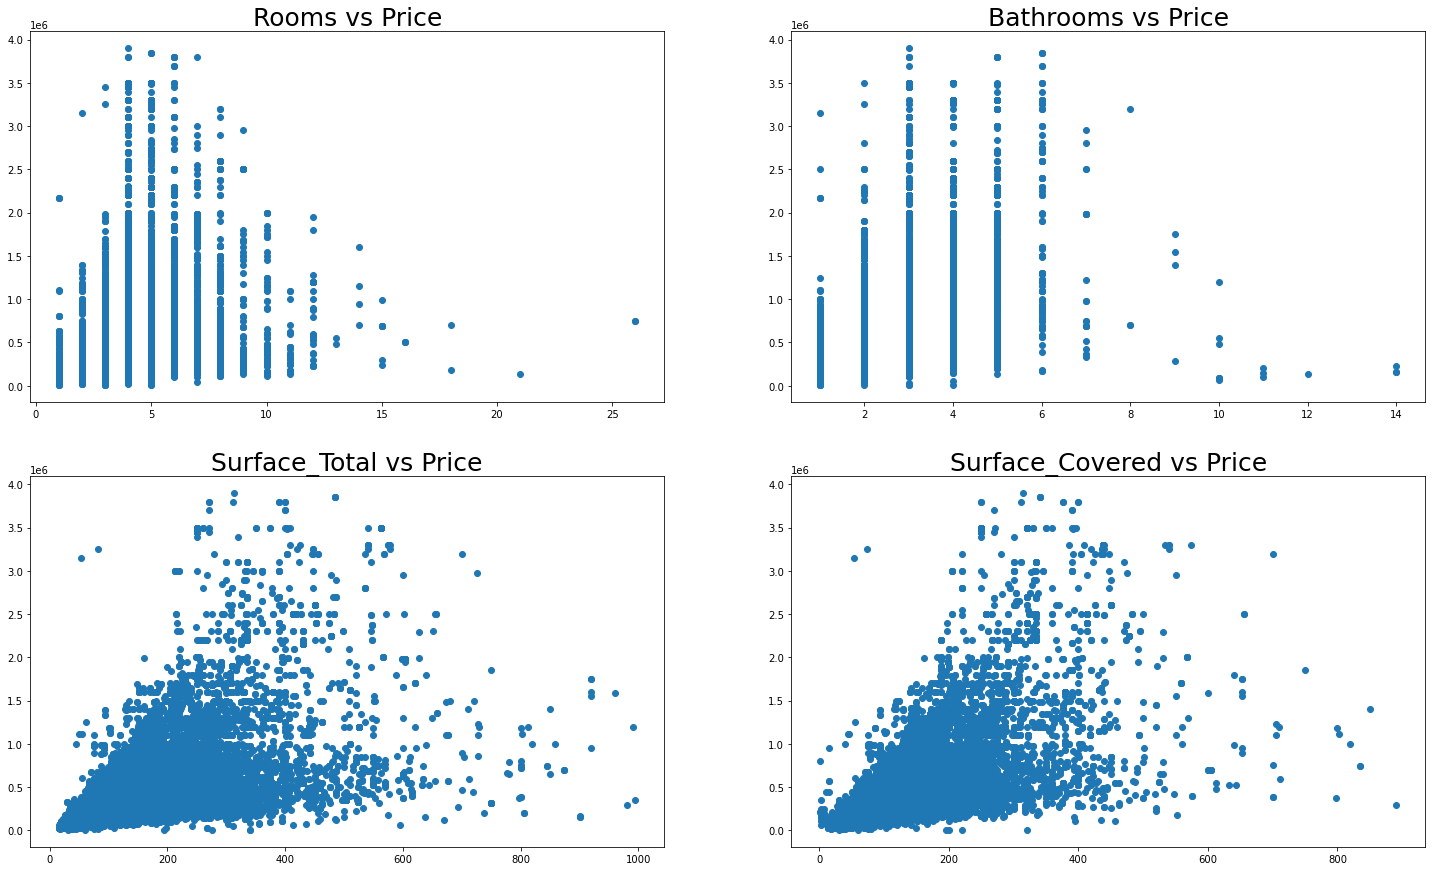

In [341]:
plt.figure(figsize = (25,15))
plt.subplot(2,2,1)
plt.scatter(x=properati.iloc[:,[8]],y=properati.iloc[:,[13]])
plt.gca().set_title('Rooms vs Price', fontsize=25)
plt.subplot(2,2,2)
plt.scatter(x=properati.iloc[:,[10]],y=properati.iloc[:,[13]])
plt.gca().set_title('Bathrooms vs Price', fontsize=25)
plt.subplot(2,2,3)
plt.scatter(x=properati.iloc[:,[11]],y=properati.iloc[:,[13]])
plt.gca().set_title('Surface_Total vs Price', fontsize=25)
plt.subplot(2,2,4)
plt.scatter(x=properati.iloc[:,[12]],y=properati.iloc[:,[13]])
plt.gca().set_title('Surface_Covered vs Price', fontsize=25)



En estas graficas de correlacion podemos notar que hay valores incongruentes puesto que en las superficies, a partir de 600 los valores del precio no llegan a valores tan altos como si lo hacen en superficies menores a 600. Lo mismo ocurre en la cantidad de habitaciones y baños, llegnado a tener valores de precios notablemente bajos en propiedades con 25 habitaciones o con 14 baños.

Entonces podemos creer que los datos pueden llegar a encontrarse sesgados de alguna manera. Por ejemplo que se realice la publicacion online con un precio que no sea el real como $11111. 

In [342]:
media_precios_casa=properati[(properati.property_type=='Casa')].groupby(['l3']).agg({'price': 'mean'})
media_precios_casa=media_precios_casa.sort_values('price')

media_precios_departamento=properati[(properati.property_type=='Departamento')].groupby(['l3']).agg({'price': 'mean'})
media_precios_departamento=media_precios_departamento.sort_values('price')

media_precios_PH=properati[(properati.property_type=='PH')].groupby(['l3']).agg({'price': 'mean'})
media_precios_PH=media_precios_PH.sort_values('price')

media_precios_all=properati.groupby(['l3']).agg({'price': 'mean'})
media_precios_all=media_precios_all.sort_values('price')

media_precios = pd.concat([media_precios_all,media_precios_casa,media_precios_departamento,media_precios_PH],axis=1)
media_precios.columns=['Media de Precios Todos','Media de Precios Casa','Media de Precios Departamento','Media de Precios PH']


print('\nLas propiedades mas caras estan en {} con un precio medio de {} dolares y las mas baratas en {} con un precio medio de {} dolares.'.format(media_precios_all.loc[media_precios_all['price'] == media_precios_all.iloc[56,0]].index[0],media_precios_all.iloc[56,0],media_precios_all.loc[media_precios_all['price'] == media_precios_all.iloc[0,0]].index[0],media_precios_all.iloc[0,0]))
print('\nLas casas mas caras estan en {} con un precio medio de {} dolares y las mas baratas en {} con un precio medio de {} dolares.'.format(media_precios_casa.loc[media_precios_casa['price'] == media_precios_casa.iloc[50,0]].index[0],media_precios_casa.iloc[50,0],media_precios_casa.loc[media_precios_casa['price'] == media_precios_casa.iloc[0,0]].index[0],media_precios_casa.iloc[0,0]))
print('\nLos departamentos mas caros estan en {} con un precio medio de {} dolares y los mas baratos en {} con un precio medio de {} dolares.'.format(media_precios_departamento.loc[media_precios_departamento['price'] == media_precios_departamento.iloc[56,0]].index[0],media_precios_departamento.iloc[56,0],media_precios_departamento.loc[media_precios_departamento['price'] == media_precios_departamento.iloc[0,0]].index[0],media_precios_departamento.iloc[0,0]))
print('\nLos PH mas caros estan en {} con un precio medio de {} dolares y los mas baratos en {} con un precio medio de {} dolares.\n'.format(media_precios_PH.loc[media_precios_PH['price'] == media_precios_PH.iloc[54,0]].index[0],media_precios_PH.iloc[54,0],media_precios_PH.loc[media_precios_PH['price'] == media_precios_PH.iloc[0,0]].index[0],media_precios_PH.iloc[0,0]))

media_precios


Las propiedades mas caras estan en Puerto Madero con un precio medio de 981050.0046484602 dolares y las mas baratas en Constitución con un precio medio de 100417.20765027322 dolares.

Las casas mas caras estan en Barrio Norte con un precio medio de 795250.0 dolares y las mas baratas en Once con un precio medio de 83000.0 dolares.

Los departamentos mas caros estan en Puerto Madero con un precio medio de 981050.0046484602 dolares y los mas baratos en Villa Soldati con un precio medio de 60182.75862068965 dolares.

Los PH mas caros estan en Barrio Norte con un precio medio de 363444.04761904763 dolares y los mas baratos en Tribunales con un precio medio de 79000.0 dolares.



,Media de Precios Todos,Media de Precios Casa,Media de Precios Departamento,Media de Precios PH
Constitución,100417.207650,371666.666667,89236.326667,129196.666667
Boca,122820.611940,318980.000000,106577.884444,174124.242424
Villa Soldati,124540.625000,162493.750000,60182.758621,190810.526316
Villa Lugano,128979.928571,256842.528736,83499.644788,135404.901961
San Nicolás,134772.774052,199000.000000,133633.417665,175764.705882
San Cristobal,140325.663839,352712.000000,127110.018445,170017.591195
Tribunales,141243.312102,NaN,141642.307692,79000.000000
Parque Avellaneda,148198.522167,235093.750000,109163.768116,147343.137255
Balvanera,149004.884082,370772.727273,135651.433051,211714.000000
Monte Castro,149888.478976,326606.060606,124284.055072,167650.881657


In [343]:
count_precios_casa=properati[(properati.property_type=='Casa')].groupby(['l3']).agg({'price': 'count'})
count_precios_casa=count_precios_casa.sort_values('price')

count_precios_departamento=properati[(properati.property_type=='Departamento')].groupby(['l3']).agg({'price': 'count'})
count_precios_departamento=count_precios_departamento.sort_values('price')

count_precios_PH=properati[(properati.property_type=='PH')].groupby(['l3']).agg({'price': 'count'})
count_precios_PH=count_precios_PH.sort_values('price')

count_precios_all=properati.groupby(['l3']).agg({'price': 'count'})
count_precios_all=count_precios_all.sort_values('price')

count_precios = pd.concat([count_precios_all,count_precios_casa,count_precios_departamento,count_precios_PH],axis=1)
count_precios.columns=['Cantidad de propiedades en total','Cantidad de Casas','Cantidad de Departamentos','Cantidad de PH']

print('\nDonde mas propiedades se venden es en {} con un total de {} propiedades y donde menos se venden es en {} con un total de {} propiedades.'.format(count_precios_all.loc[count_precios_all['price'] == count_precios_all.iloc[56,0]].index[0],count_precios_all.iloc[56,0],count_precios_all.loc[count_precios_all['price'] == count_precios_all.iloc[0,0]].index[0],count_precios_all.iloc[0,0]))
print('\nDonde mas casas se venden es en {} con un total de {} casas y donde menos se venden es en {} con un total de {} casas'.format(count_precios_casa.loc[count_precios_casa['price'] == count_precios_casa.iloc[50,0]].index[0],count_precios_casa.iloc[50,0],count_precios_casa.loc[count_precios_casa['price'] == count_precios_casa.iloc[0,0]].index[0],count_precios_casa.iloc[0,0]))
print('\nDonde mas deptos se venden es en {} con un total de {} deptos y donde menos se venden es en {} con un total de {} deptos.'.format(count_precios_departamento.loc[count_precios_departamento['price'] == count_precios_departamento.iloc[56,0]].index[0],count_precios_departamento.iloc[56,0],count_precios_departamento.loc[count_precios_departamento['price'] == count_precios_departamento.iloc[0,0]].index[0],count_precios_departamento.iloc[0,0]))
print('\nDonde mas PH se venden es en {} con un total de {} PH y donde menos se venden es en {} con un total de {} PH.\n'.format(count_precios_PH.loc[count_precios_PH['price'] == count_precios_PH.iloc[54,0]].index[0],count_precios_PH.iloc[54,0],count_precios_PH.loc[count_precios_PH['price'] == count_precios_PH.iloc[0,0]].index[0],count_precios_PH.iloc[0,0]))


count_precios


Donde mas propiedades se venden es en Palermo con un total de 12295 propiedades y donde menos se venden es en Catalinas con un total de 5 propiedades.

Donde mas casas se venden es en Villa Devoto con un total de 176 casas y donde menos se venden es en San Nicolás con un total de 1 casas

Donde mas deptos se venden es en Palermo con un total de 11186 deptos y donde menos se venden es en Catalinas con un total de 5 deptos.

Donde mas PH se venden es en Palermo con un total de 1050 PH y donde menos se venden es en Tribunales con un total de 1 PH.



,Cantidad de propiedades en total,Cantidad de Casas,Cantidad de Departamentos,Cantidad de PH
Catalinas,5,NaN,5,NaN
Villa Riachuelo,34,4.0,10,20.0
Villa Soldati,64,16.0,29,19.0
Villa Real,127,13.0,73,41.0
Velez Sarsfield,134,14.0,75,45.0
Agronomía,152,14.0,85,53.0
Tribunales,157,NaN,156,1.0
Pompeya,199,50.0,63,86.0
Versalles,202,36.0,100,66.0
Parque Avellaneda,203,32.0,69,102.0


Donde mas propiedades se venden es en Palermo con un total de 12293 propiedades y donde menos se venden es en Catalinas con un total de 5 propiedades.

Las propiedades mas caras estan en Puerto Madero (aunque solo se venden departamentos) con un precio medio de 981050.0046484602 dolares y las mas baratas en Constitución con un precio medio de 100417.20765027322 dolares.

Donde mas propiedades se venden es en Palermo con un total de 12293 propiedades y al mismo tiempo la media de precios es la quinta mas alta. Por lo que podemos concluir ques es una zona de gran flujo de compra venta de inmuebles. Lo mismo en Belgrano y Recoleta puesto que se encuentran entre los primeros puestos en mayor cantidad de propiedades en venta y en media de precios mas altas.



### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [344]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO

In [345]:
properati.shape

(81083, 19)

In [346]:
properati.head(1)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
336,2019-03-04,2019-06-09,2019-03-04,-34.620739,-58.394437,Argentina,Capital Federal,San Cristobal,3.0,1.0,2.0,116.0,116.0,290000.0,USD,Venta casa esquina Carlos Calvo y Sarandí,Corredor Responsable: Cristian Arnal Ponti - C...,Casa,Venta


Dejo solo las columnas rooms, bedrooms, bathrooms, surface_total, surface_covered y price.

In [347]:
data_final = properati.iloc[:,[8,9,10,11,12,13]]
data_final.shape

(81083, 6)

In [348]:
data_final.isna().sum()

rooms                0
bedrooms             0
bathrooms          829
surface_total        0
surface_covered      0
price                0
dtype: int64

In [349]:
data_final=data_final.dropna()

A partir de las condiciones que se dieron, estas se siguieron paso a paso y sin embargo, luego de realizar los filtros y descartar los valores nulos obtenemos un dataframe con 80211 instancias y 6 columnas

In [350]:
data_final.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,80254.000000,80254.000000,80254.000000,80254.000000,80254.000000,8.025400e+04
mean,3.005956,1.999290,1.552994,95.280472,81.996785,2.634627e+05
std,1.296379,1.042796,0.848807,76.806321,61.245902,2.956780e+05
min,1.000000,0.000000,1.000000,16.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,50.000000,44.000000,1.250000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.800000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.800000e+05
max,26.000000,15.000000,14.000000,995.000000,891.000000,3.900000e+06


In [351]:
data_final.head(1)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
336,3.0,1.0,2.0,116.0,116.0,290000.0


# Modelos

En primera instancia vamos a desarrollar los modelos utilando todas las columnas de nuestro dataset final.

Se opto realizar los modelos utilizando la métrica RMSE ya que la variable que buscamos predecir es ¨price¨, la cual es una variable continua. Y para esto es mejor realizarlos con una metrica de regresión en vez de clasificación. 

Vamos a comparar 3 modelos de regresion y de estos vamos a concluir cual de ellos es el mas optimo para la prediccion de nuestra varible.

In [352]:
X=data_final.iloc[:,[0,1,2,3,4]]
y=data_final.price.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56177, 5) (56177,) (24077, 5) (24077,)


In [353]:
lista_rmse_train_tree = []
lista_rmse_test_tree = []

# Definimos la lista de valores de k que vamos a explorar
max_depths = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

# Generamos un loop sobre los distintos valores de k 
for max_depth in max_depths:
    
    tree_regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    tree_regressor.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = tree_regressor.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = tree_regressor.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train_tree.append(rmse_train)
    lista_rmse_test_tree.append(rmse_test)

Text(0, 0.5, 'rmse')

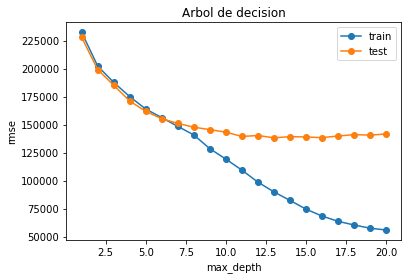

In [354]:
plt.plot(max_depths, lista_rmse_train_tree,'o-',label='train' )
plt.plot(max_depths, lista_rmse_test_tree,'o-',label='test')
plt.legend()
plt.title('Arbol de decision')
plt.xlabel('max_depth')
plt.ylabel('rmse')

A pesar de que se evidencian unos resultados bajos en testing con un numero de max_depth=20 , es importante evidenciar que para un max_depth=8 se obtiene una robustez en el modelo en la medida que la diferencia entre training y test es mas reducida.

Un modelo mas estable seria el que se encuentra alrededor del 8 puesto que el error comienza a degradarse en ambos sentidos de una forma mas pareja.

In [355]:
lista_rmse_train_k_neighbors = []
lista_rmse_test_k_neighbors = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
    
    clf = KNeighborsRegressor(n_neighbors= k)
    clf.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train_k_neighbors.append(rmse_train)
    lista_rmse_test_k_neighbors.append(rmse_test)

Text(0, 0.5, 'rmse')

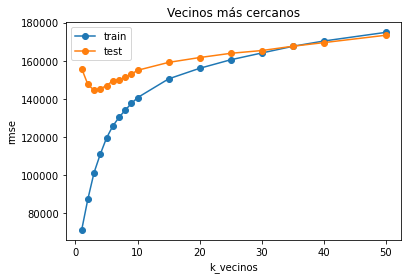

In [356]:
plt.plot(k_vecinos, lista_rmse_train_k_neighbors,'o-',label='train' )
plt.plot(k_vecinos, lista_rmse_test_k_neighbors,'o-',label='test')
plt.legend()
plt.title('Vecinos más cercanos')
plt.xlabel('k_vecinos')
plt.ylabel('rmse')

A pesar de que se evidencian unos resultados bajos en testing con un numero de k=3 , es importante evidenciar que para un k=11 se obtiene una robustez en el modelo en la medida que la diferencia entre training y test es mas reducida.

Un modelo mas estable seria el que se encuentra alrededor del 11 puesto que el error comienza a degradarse en ambos sentidos de una forma mas pareja.

In [357]:
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=8, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=11)

Realizamos nuestros modelos con max_depth=8  y n_neighbors=7

In [358]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=11)

In [359]:
print(linear_model.coef_, linear_model.intercept_)

[-11016.82180563 -65355.01441086  95705.23610806   -148.29427084
   3857.7749518 ] -23636.356952700648


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


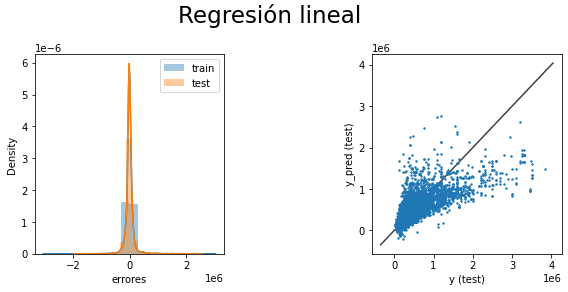

Los RMSE en Regresión lineal son:
Raíz del error cuadrático medio en Train: 182967.51104926792
Raíz del error cuadrático medio en Test: 177347.48790190063




D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


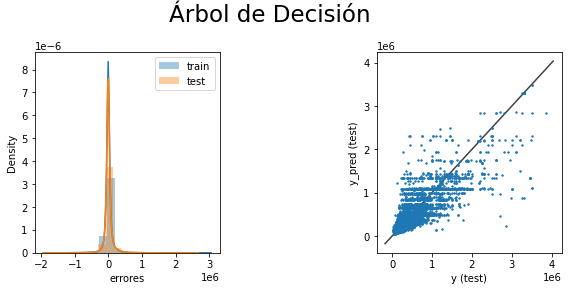

Los RMSE en Árbol de Decisión son:
Raíz del error cuadrático medio en Train: 140807.27003962157
Raíz del error cuadrático medio en Test: 147717.26123313134




D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


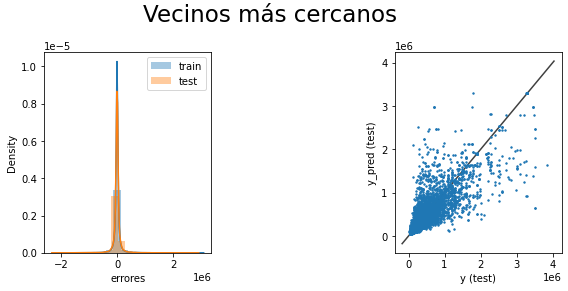

Los RMSE en Vecinos más cercanos son:
Raíz del error cuadrático medio en Train: 143341.71091954765
Raíz del error cuadrático medio en Test: 156022.95719711244




In [360]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    plt.text(x=0.15, y=0.25, s='{}'.format(modelos[i]), fontsize=23, ha="center", transform=fig.transFigure)
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()
    
    print('Los RMSE en {} son:'.format(modelos[i]))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    print('\n')

Anlizamos las graficas obtenidas de valores reales vs valores predichos en cada uno de los modelos y tuvimos en cuenta sus errores tanto en testing como en train. De esta manera lLegamos a la conclusion de que el modelo de arbol de decision es el que mejor desempeño tiene. Con un valor de RMSE menor al resto de los modelos en testing y en train. También podemos concluir que a medida que aumentan los valores del precio en sus valores reales tanto como en los predichos, se nota una menor correlacion que en sus valores mas pequeños.

### Modelo utilizando surface_covered y bathroom

A continuacion vamos a realizar los modelos utilizando las columnas bathroom y surface_covered. Se opto analizar tambien con solo estas variables debido a la gran correlacion que tiene cada una con respecto del precio por sobre las otras y tambien analizar si el conjunto de ambas puede llevar a un modelo mas robusto.

Vamos a comenzar graficando estas variables en relacion con el precio en un grafico 3D y luego procederemos de la misma manera realizada prerviamente.

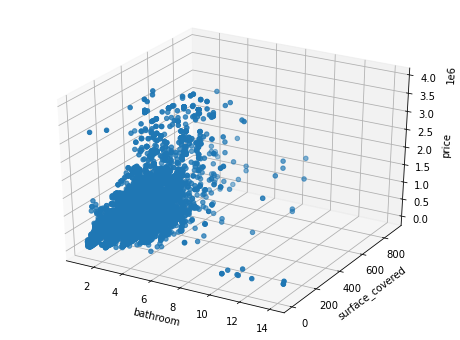

In [361]:
from mpl_toolkits.mplot3d import Axes3D

x1=data_final.iloc[:,2] # Columna bathrooms
x2=data_final.iloc[:,4] # Columna surface_covered
y=data_final.price.values

def plot_3d_scatter(x1, x2, y, ax=None, fig = None):
    if (fig is None) and (ax is None):
        fig = plt.figure(figsize = (8,6))
        ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, x2, y)

    ax.set_xlabel('bathroom')
    ax.set_ylabel('surface_covered')
    ax.set_zlabel('price')

plot_3d_scatter(x1, x2, y, ax=None, fig = None)

In [362]:
X = np.vstack((x1,x2)).T

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56177, 2) (56177,) (24077, 2) (24077,)


In [363]:
lista_rmse_train_tree = []
lista_rmse_test_tree = []

# Definimos la lista de valores de k que vamos a explorar
max_depths = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

# Generamos un loop sobre los distintos valores de k 
for max_depth in max_depths:
    
    tree_regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    tree_regressor.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = tree_regressor.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = tree_regressor.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train_tree.append(rmse_train)
    lista_rmse_test_tree.append(rmse_test)

Text(0, 0.5, 'rmse')

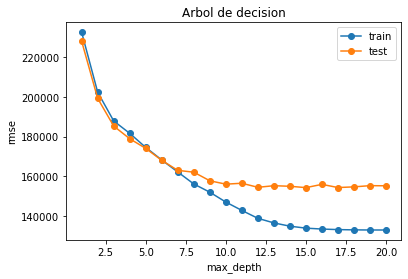

In [364]:
plt.plot(max_depths, lista_rmse_train_tree,'o-',label='train' )
plt.plot(max_depths, lista_rmse_test_tree,'o-',label='test')
plt.legend()
plt.title('Arbol de decision')
plt.xlabel('max_depth')
plt.ylabel('rmse')

Con el modelo del arbol de decisiones podemos notar que se obtuvo un modelo mucho mas robusto en terminos generales en comparacion al realizado previamente con mas parametros. Cuando max_depth= 10 nos encontramos con un error cercano al minimo posible y encontrandonos con un modelo con errores parejos para el testing y el train.

In [365]:
lista_rmse_train_k_neighbors = []
lista_rmse_test_k_neighbors = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsRegressor(n_neighbors= k)
    
    # Entrenar el modelo
    clf.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train_k_neighbors.append(rmse_train)
    lista_rmse_test_k_neighbors.append(rmse_test)

Text(0, 0.5, 'rmse')

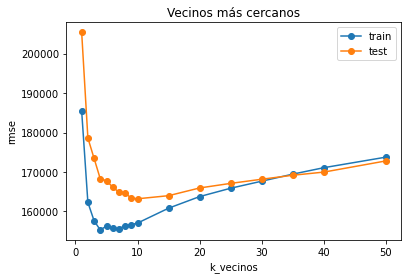

In [366]:
plt.plot(k_vecinos, lista_rmse_train_k_neighbors,'o-',label='train' )
plt.plot(k_vecinos, lista_rmse_test_k_neighbors,'o-',label='test')
plt.title('Vecinos más cercanos')
plt.legend()
plt.xlabel('k_vecinos')
plt.ylabel('rmse')

Con el modelo de vecinos mas cercanos podemos notar que se obtuvo un modelo mucho mas robusto en terminos generales en comparacion al realizado previamente con mas parametros. Cuando k= 11 nos encontramos con el error minimo posible y encontrandonos al mismo tiempo con un modelo con errores parejos para el testing y el train.

In [367]:
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=10, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=11)

In [368]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=11)

In [369]:
print(linear_model.coef_, linear_model.intercept_)

[78585.92152181  2866.06267015] -93649.18198284041


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


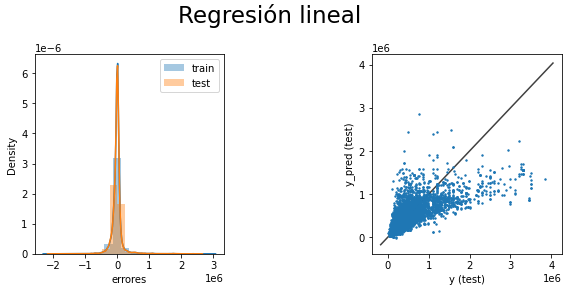

Los RMSE en Regresión lineal son:
Raíz del error cuadrático medio en Train: 190781.17361075728
Raíz del error cuadrático medio en Test: 186070.2540717336




D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


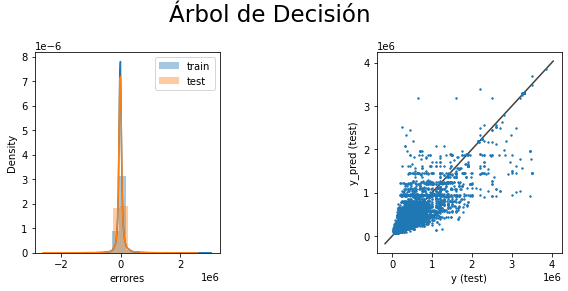

Los RMSE en Árbol de Decisión son:
Raíz del error cuadrático medio en Train: 147004.21925187623
Raíz del error cuadrático medio en Test: 156018.01397052594




D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


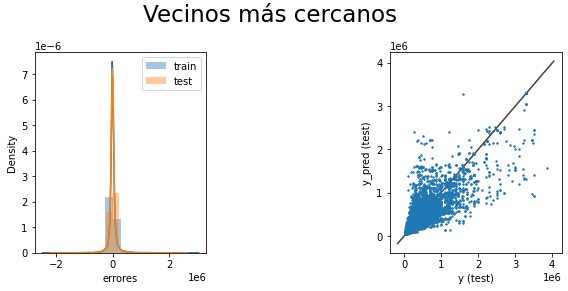

Los RMSE en Vecinos más cercanos son:
Raíz del error cuadrático medio en Train: 158216.2017188566
Raíz del error cuadrático medio en Test: 163382.45672692818




In [370]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    plt.text(x=0.15, y=0.25, s='{}'.format(modelos[i]), fontsize=23, ha="center", transform=fig.transFigure)
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()
    print('Los RMSE en {} son:'.format(modelos[i]))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    print('\n')

Anlizamos las graficas obtenidas de valores reales vs valores predichos en cada uno de los modelos y tuvimos en cuenta sus errores tanto en testing como en train. De esta manera lLegamos a la conclusion de que el modelo de arbol de decision es el que mejor desempeño tiene. Con un valor de RMSE menor al resto de los modelos en testing y en train. También podemos concluir que a medida que aumentan los valores del precio en sus valores reales tanto como en los predichos, se nota una menor correlacion que en sus valores mas pequeños.

# Conclusiones

Como conclusion final podemos afirmar que los modelos en ambos casos, con todas las variables como con sólo bathroom y surface_covered, se comportan de manera similar. Ambos obtuvieron un mejor desempeño en el arbol de decision con una mejor cifra de error que el resto. 

Notamos también que en el caso de la realizacion de los modelos con tan sólo las variables bathroom y surface_covered, el error es un poco mayor pero su diferencia entre train y test es menor que la diferencia entre ambas que en el caso de la utilizacion de todas las variables.

En la elaboración de modelos, es común encontrar una pérdida de precisión o un aumento de error a medida que remuevo variables. Es decir que se pierde información (aunque sea minima) de las variables que retiro. Ahora si bien es cierto, la mayor cantidad de información se puede concentrar en dos variables, puede que ser nos esté escapando alguna que quizás con algún tratamiento pueda darnos algo más de información y por ende mejorar los resultados del modelo. 

Por lo tanto a pesar de utilizar menos variables, estoy evidenciando un comportamiento más congruente en la relación de resultados de entrenamiento y pruebas. También que la mayor cantidad de información relevante para estimar el valor del inmueble se encuentra en las dos variables **bathroom y surface_covered**.

